In [40]:
import pandas as pd

In [41]:
data = pd.read_csv(r'C:\ProgramData\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\games.csv')
missing_values = data.isnull().sum()
print(missing_values)
data.dropna(inplace=True)
average_ratings = data.groupby('winner')['white_rating'].mean()


id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64


In [42]:
general_stats = data.describe()
print(general_stats)

         created_at  last_move_at         turns  white_rating  black_rating  \
count  2.005800e+04  2.005800e+04  20058.000000  20058.000000  20058.000000   
mean   1.483617e+12  1.483618e+12     60.465999   1596.631868   1588.831987   
std    2.850151e+10  2.850140e+10     33.570585    291.253376    291.036126   
min    1.376772e+12  1.376772e+12      1.000000    784.000000    789.000000   
25%    1.477548e+12  1.477548e+12     37.000000   1398.000000   1391.000000   
50%    1.496010e+12  1.496010e+12     55.000000   1567.000000   1562.000000   
75%    1.503170e+12  1.503170e+12     79.000000   1793.000000   1784.000000   
max    1.504493e+12  1.504494e+12    349.000000   2700.000000   2723.000000   

        opening_ply  
count  20058.000000  
mean       4.816981  
std        2.797152  
min        1.000000  
25%        3.000000  
50%        4.000000  
75%        6.000000  
max       28.000000  


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt


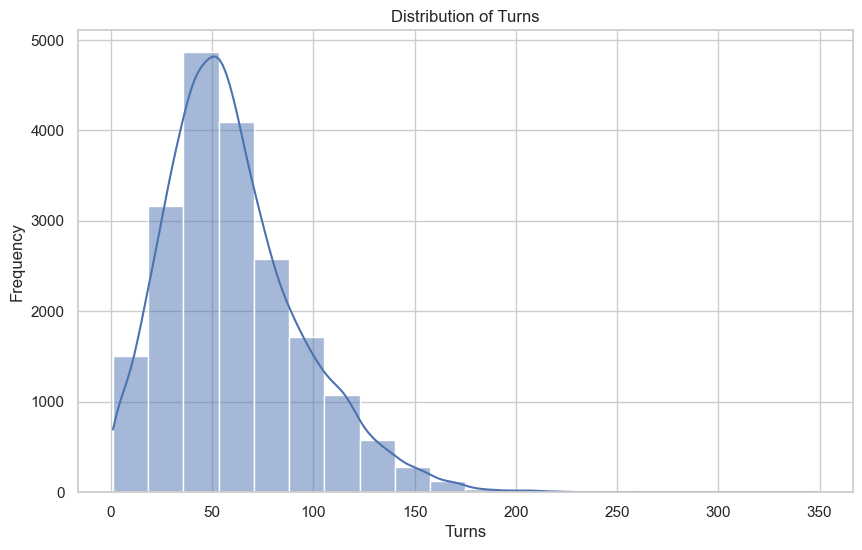

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(data['turns'], bins=20, kde=True)
plt.title('Distribution of Turns')
plt.xlabel('Turns')
plt.ylabel('Frequency')
plt.show()

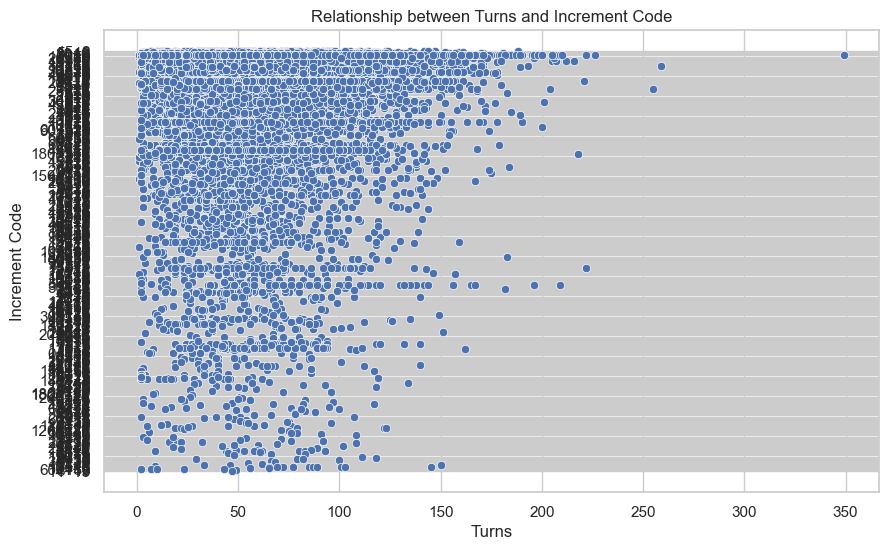

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='turns', y='increment_code', data=data)
plt.title('Relationship between Turns and Increment Code')
plt.xlabel('Turns')
plt.ylabel('Increment Code')
plt.show()

In [20]:
win_rates = data.groupby('winner')['winner'].count() / len(data)
print("Win Rates:")
print(win_rates)

Win Rates:
winner
black    0.454033
draw     0.047363
white    0.498604
Name: winner, dtype: float64


In [10]:
average_ratings = data.groupby('winner')['white_rating'].mean()
print("\nAverage Ratings:")
print(average_ratings)


Average Ratings:
winner
black    1549.246184
draw     1655.558947
white    1634.184182
Name: white_rating, dtype: float64


In [11]:
top_openings = data['opening_name'].value_counts().head(10)
print("\nTop 10 Popular Openings:")
print(top_openings)


Top 10 Popular Openings:
opening_name
Van't Kruijs Opening                             368
Sicilian Defense                                 358
Sicilian Defense: Bowdler Attack                 296
Scotch Game                                      271
French Defense: Knight Variation                 271
Scandinavian Defense: Mieses-Kotroc Variation    259
Queen's Pawn Game: Mason Attack                  232
Queen's Pawn Game: Chigorin Variation            229
Scandinavian Defense                             223
Horwitz Defense                                  209
Name: count, dtype: int64


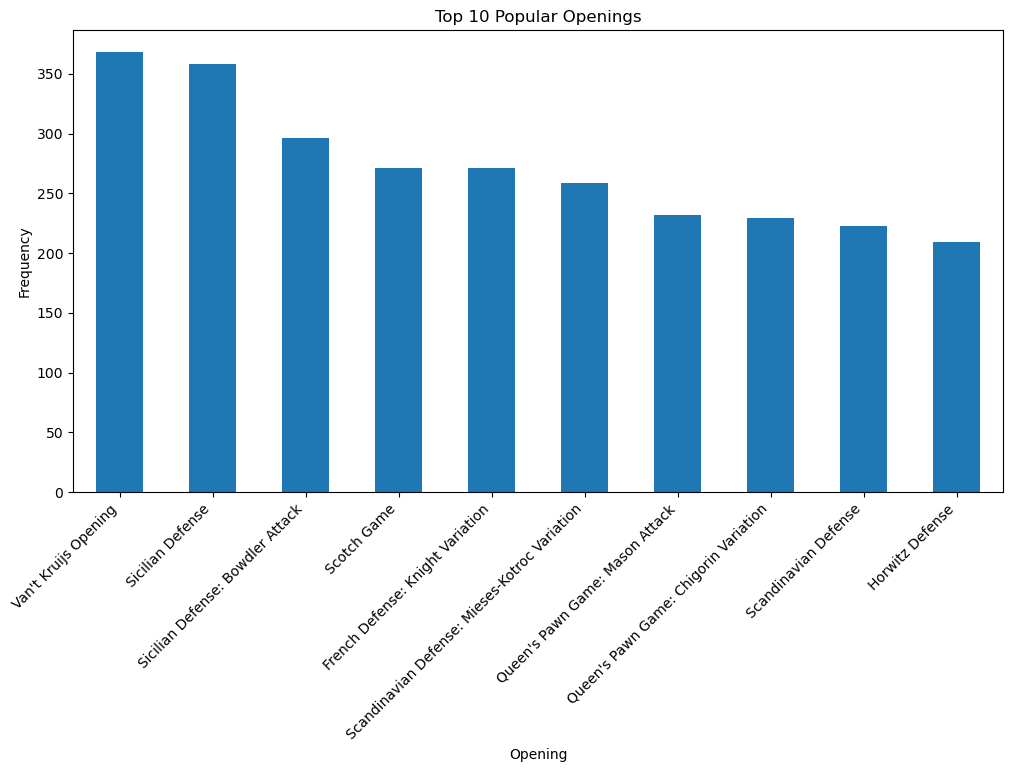

In [14]:
plt.figure(figsize=(12, 6))
top_openings.plot(kind='bar')
plt.title('Top 10 Popular Openings')
plt.xlabel('Opening')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

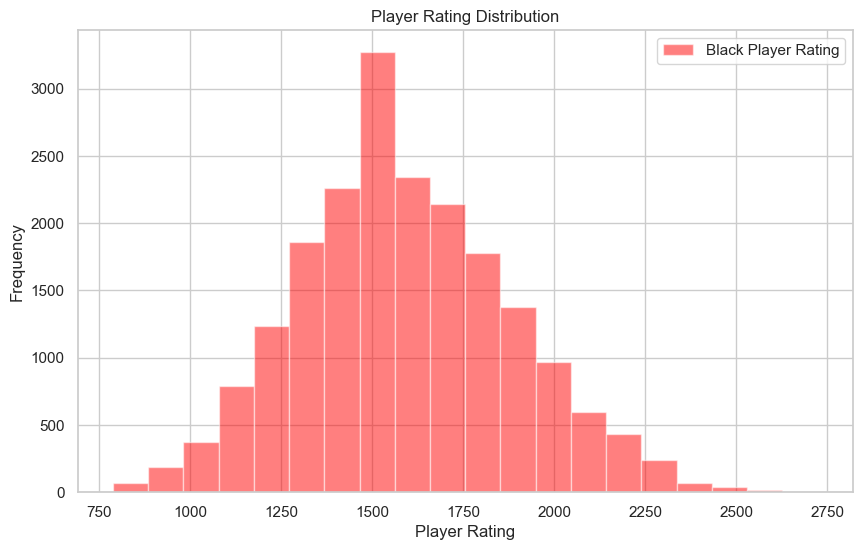

In [50]:
import matplotlib.pyplot as plt

# Visualize player rating distribution
plt.figure(figsize=(10, 6))
plt.hist(data['black_rating'], bins=20, alpha=0.5, label='Black Player Rating',color='red')
plt.xlabel('Player Rating')
plt.ylabel('Frequency')
plt.title('Player Rating Distribution')
plt.legend()
plt.show()


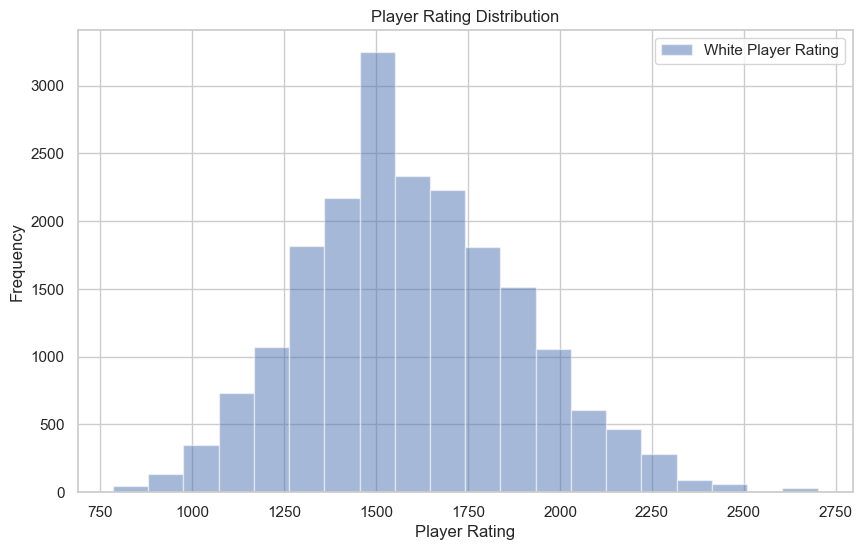

In [39]:
import matplotlib.pyplot as plt

# Visualize player rating distribution
plt.figure(figsize=(10, 6))
plt.hist(data['white_rating'], bins=20, alpha=0.5, label='White Player Rating')
plt.xlabel('Player Rating')
plt.ylabel('Frequency')
plt.title('Player Rating Distribution')
plt.legend()
plt.show()


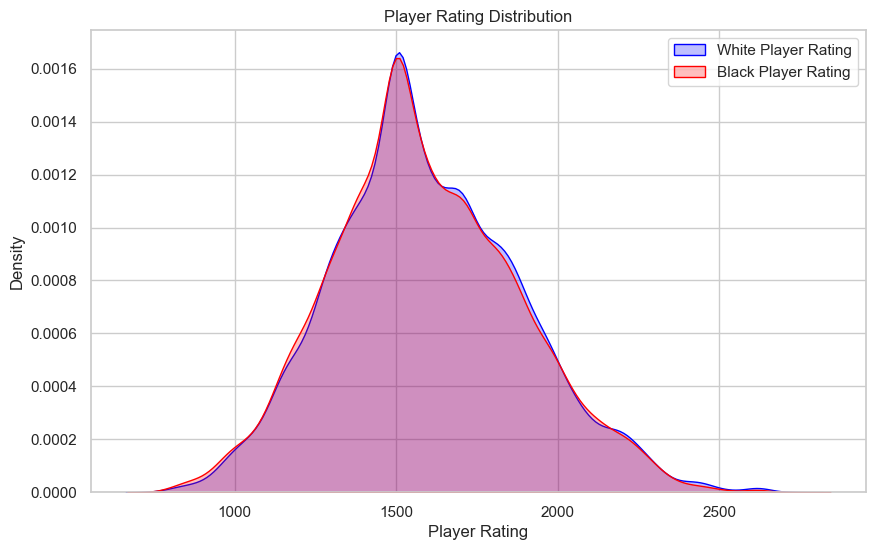

In [18]:
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create KDE plot for player rating distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data['white_rating'], color='blue', label='White Player Rating', fill=True)
sns.kdeplot(data['black_rating'], color='red', label='Black Player Rating', fill=True)
plt.xlabel('Player Rating')
plt.ylabel('Density')
plt.title('Player Rating Distribution')
plt.legend()
plt.show()


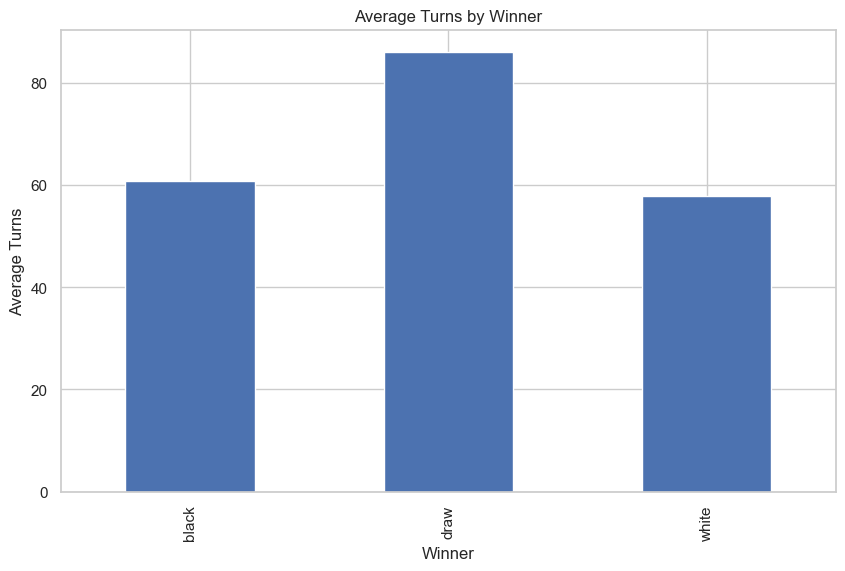

In [22]:
# Relationship between winning and number of turns
average_turns = data.groupby('winner')['turns'].mean()

# Visualize average turns by winner
plt.figure(figsize=(10, 6))
average_turns.plot(kind='bar')
plt.title('Average Turns by Winner')
plt.xlabel('Winner')
plt.ylabel('Average Turns')
plt.show()

Columns with non-numeric data: Index(['id', 'rated', 'victory_status', 'winner', 'increment_code', 'white_id',
       'black_id', 'moves', 'opening_eco', 'opening_name'],
      dtype='object')


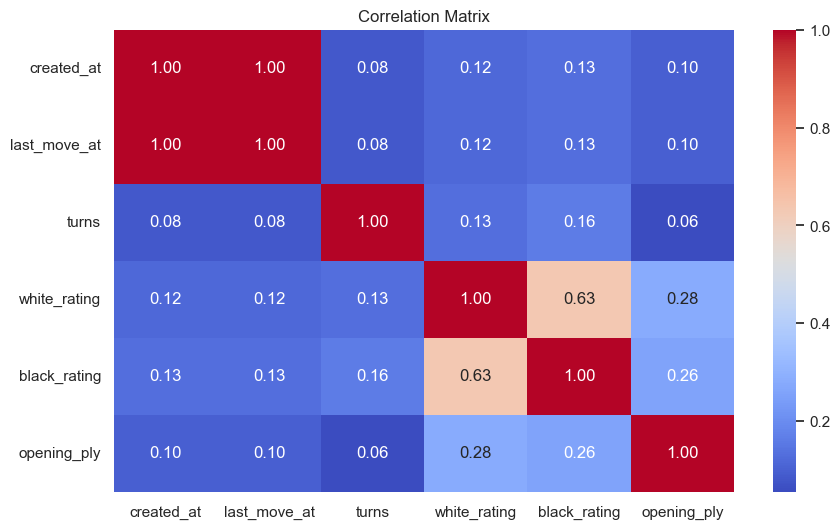

In [31]:
# Identify columns with non-numeric data
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print("Columns with non-numeric data:", non_numeric_columns)

# Exclude non-numeric columns from correlation analysis
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


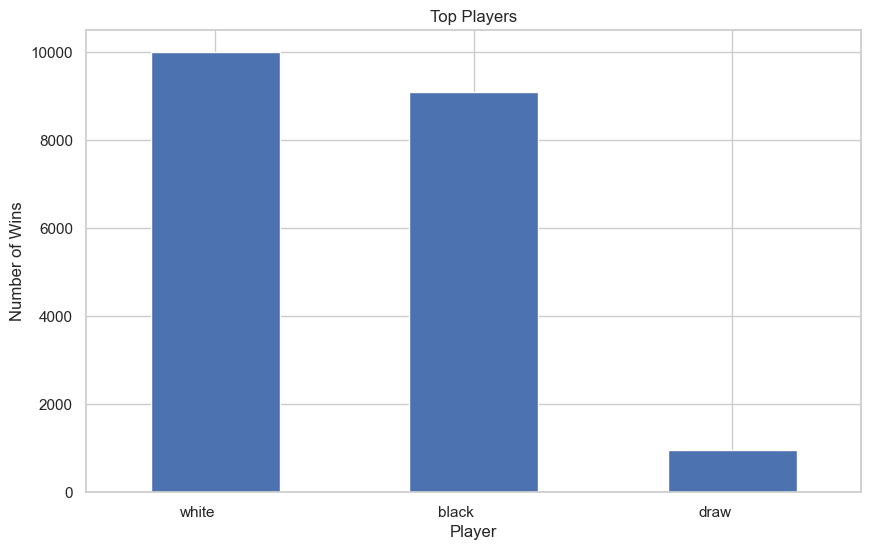

In [55]:
# Identify top players based on winning percentage or other criteria
top_players = data.groupby(['winner'])['id'].count().nlargest(10)

# Visualize top players
plt.figure(figsize=(10, 6))
top_players.plot(kind='bar')
plt.title('Top Players')
plt.xlabel('Player')
plt.ylabel('Number of Wins')
plt.xticks(rotation=0, ha='right')
plt.show()


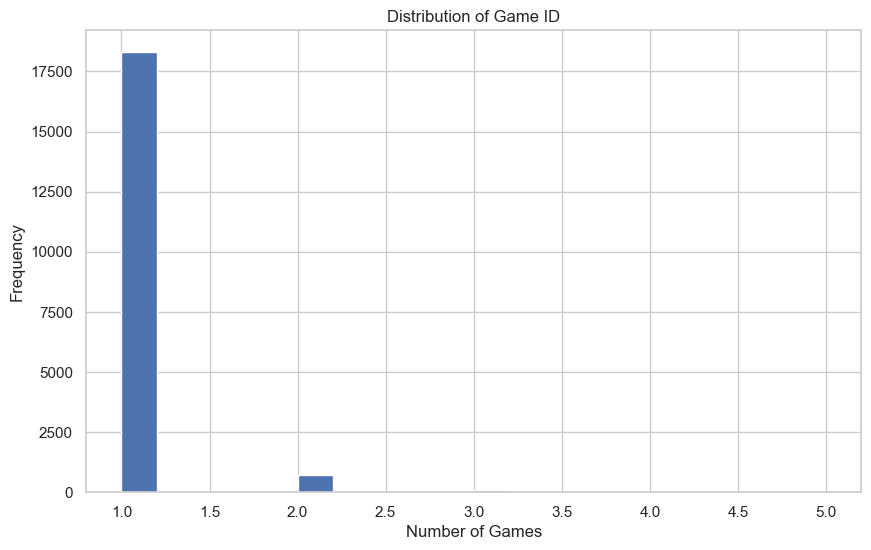

In [90]:
# Step 3: Analyze the distribution of Game ID
game_id_counts = data['id'].value_counts()

# Step 4: Visualize the distribution of Game ID
plt.figure(figsize=(10, 6))
game_id_counts.hist(bins=20)
plt.title('Distribution of Game ID')
plt.xlabel('Number of Games')
plt.ylabel('Frequency')
plt.show()

Number of unique players: 9438


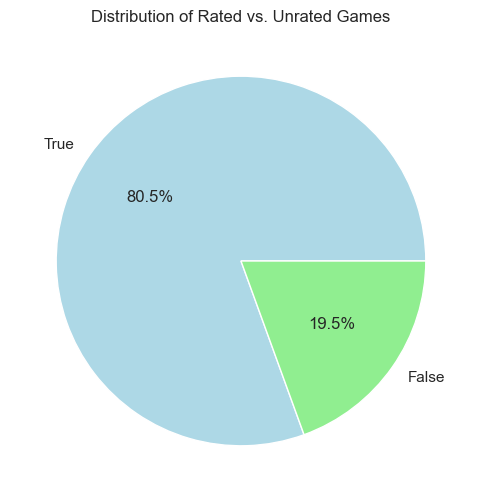

In [91]:
unique_players = pd.concat([data['white_id'], data['white_id']]).nunique()

# Step 6: Calculate the number of unique players
print("Number of unique players:", unique_players)

# Step 7: Analyze rated vs. unrated games
rated_counts = data['rated'].value_counts(normalize=True)

# Step 8: Visualize rated vs. unrated games
plt.figure(figsize=(8, 6))
rated_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Rated vs. Unrated Games')
plt.ylabel('')
plt.show()

Text(0, 0.5, 'Percentage')

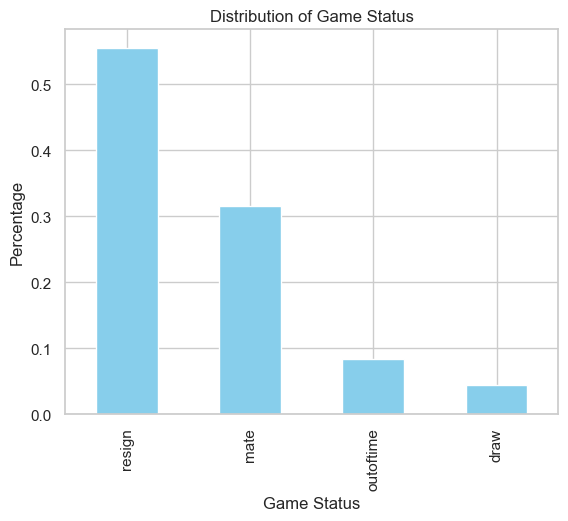

In [94]:
game_status_counts = data['victory_status'].value_counts(normalize=True)
winner_counts = data['winner'].value_counts(normalize=True)

# Step 10: Visualize game status distribution
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
game_status_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Game Status')
plt.xlabel('Game Status')
plt.ylabel('Percentage')



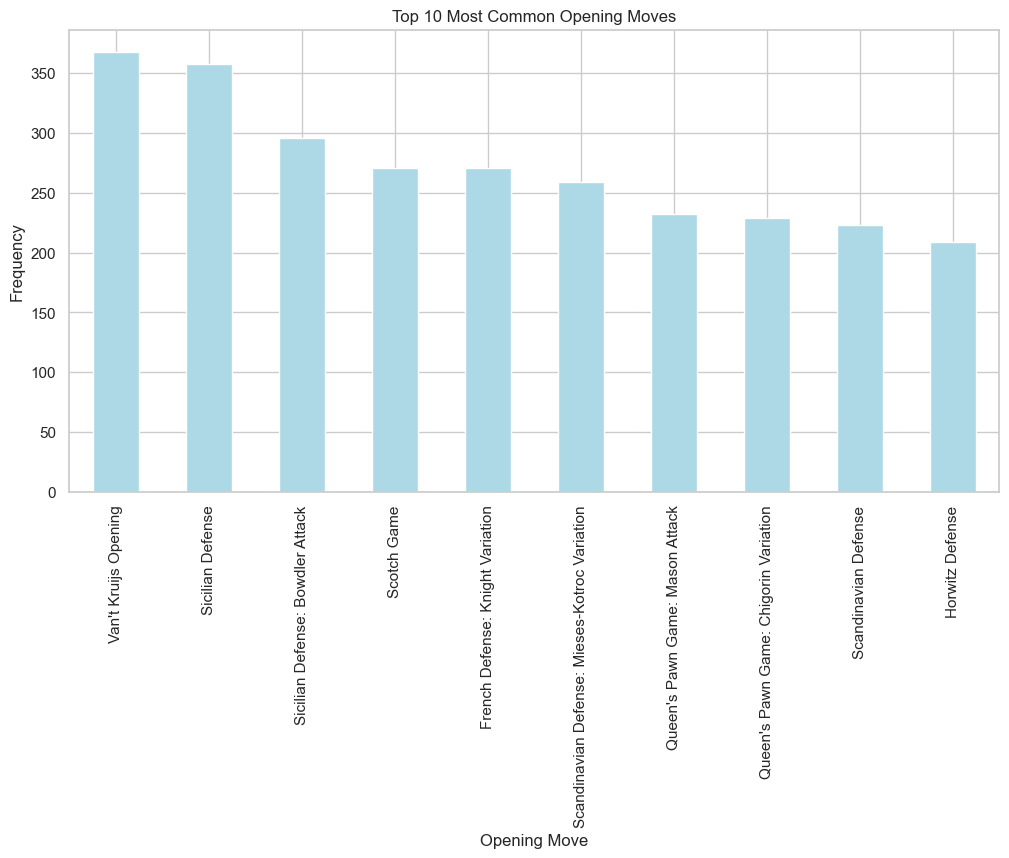

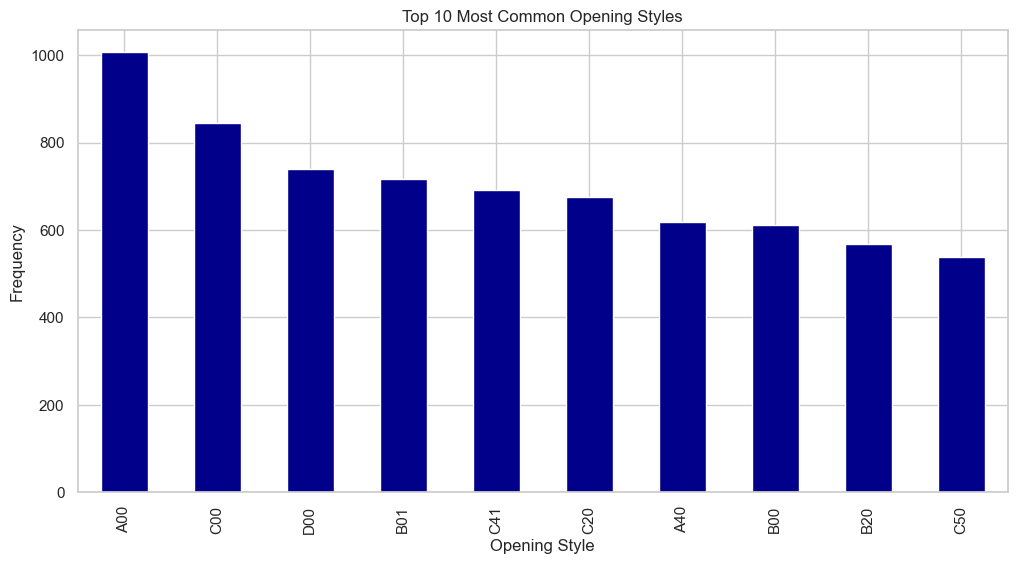

In [96]:
opening_moves_counts = data['opening_name'].value_counts()
opening_styles_counts = data['opening_eco'].value_counts()

# Step 17: Visualize top opening moves
plt.figure(figsize=(12, 6))
opening_moves_counts.head(10).plot(kind='bar', color='lightblue')
plt.title('Top 10 Most Common Opening Moves')
plt.xlabel('Opening Move')
plt.ylabel('Frequency')
plt.show()

# Step 18: Visualize top opening styles
plt.figure(figsize=(12, 6))
opening_styles_counts.head(10).plot(kind='bar', color='darkblue')
plt.title('Top 10 Most Common Opening Styles')
plt.xlabel('Opening Style')
plt.ylabel('Frequency')
plt.show()

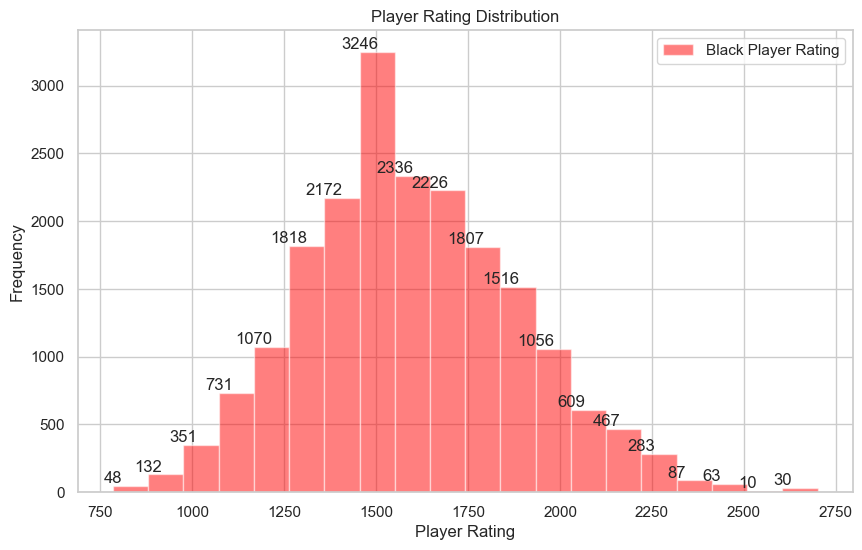

In [100]:
import matplotlib.pyplot as plt

# Visualize player rating distribution
plt.figure(figsize=(10, 6))
n, bins, _ = plt.hist(data['white_rating'], bins=20, alpha=0.5, label='Black Player Rating', color='red')

# Add data labels
for i in range(len(n)):
    plt.text(bins[i], n[i], f'{int(n[i])}', ha='center', va='bottom')

plt.xlabel('Player Rating')
plt.ylabel('Frequency')
plt.title('Player Rating Distribution')
plt.legend()
plt.show()
